In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
np.random.seed(0)

In [2]:
auto = pd.read_csv('Auto.csv')
#check data has been read in properly
auto=auto.sort_values(by='horsepower')
auto

,mpg,horsepower
19,26.0,46
101,26.0,46
324,43.4,48
323,44.3,48
242,43.1,48
...,...,...
6,14.0,220
8,14.0,225
94,12.0,225
13,14.0,225


In [3]:
y=auto['mpg'].values
x=auto['horsepower'].values.reshape(-1,1)

In [4]:


from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [5]:
len(X_train)


313

In [6]:
Y_train

array([32. , 14. , 26. , 18.5, 28. , 12. , 14. , 23. , 15. , 23.9, 13. ,
       13. , 15. , 16. , 32.2, 25.5, 24. , 38.1, 34.7, 31. , 28. , 28. ,
       19.2, 15. , 29. , 33. , 17.6, 17.5, 12. , 21. , 26. , 14.5, 29. ,
       18. , 22. , 16. , 13. , 23. , 20.6, 39. , 19. , 15.5, 27.9, 14. ,
       17. , 31.6, 28. , 36.4, 26.6, 32.3, 16. , 13. , 35.1, 37.3, 15. ,
       18. , 29. , 14. , 31. , 24. , 30.5, 12. , 33. , 39.4, 37. , 16. ,
       33. , 36.1, 34.5, 22.5, 11. , 36. , 30. , 30.5, 43.1, 14. , 22. ,
       19.2, 20. , 14. , 14. , 19. , 15. , 21. , 28. , 36. , 20.5, 10. ,
       15. , 36.1, 24. , 27. , 19. , 26. , 19. , 22.3, 16.5, 43.4, 26. ,
       27.2, 38. , 44.3, 15. , 34.1, 21.5, 12. , 20.2, 22. , 25. , 28. ,
       13. , 21.5, 27. , 13. , 17.5, 23. , 24. , 25. , 27. , 20. , 26. ,
       35.7, 33.5, 26.5, 25. , 31.5, 31. , 18. , 16. , 14. , 27. ,  9. ,
       26.6, 32. , 13. , 23.2, 14. , 15.5, 16. , 18. , 23.7, 16. , 32. ,
       20. , 17.7, 34.2, 33.7, 24. , 25. , 25.4, 15

Şimdi ayırdığım X_train ve Y_train setini tekrar train ve validation setine bölüyorum


In [7]:
from sklearn.model_selection import train_test_split
X_trainv, X_valid, Y_trainv, Y_valid = train_test_split(X_train, Y_train, test_size=0.5, random_state=7)

#oormalde 0.5 olarak ayrılmaz daha büyük bir kısmı train için alınır.

In [8]:
len(Y_trainv)

156

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [ ]:
def create_polynomial_regression_model(degree):
  "Creates a polynomial regression model for the given degree"
#İlk olarak create_polynomial_regression_model(degree) şeklinde fonksiyon tanımladık.Degree değişkeni 
#sonra    poly_features adında bir instances oluşturduk.
  poly_features = PolynomialFeatures(degree=degree,include_bias=False)
  
  # transforms the existing features to higher degree features.
  X_trainv_poly = poly_features.fit_transform(X_trainv)
#ayırdığımız trainv datasetini .fit_transform fonk ile 2,3 veya 4.dereceden  
#polynomial feature olarak tranform ettik ve  X_trainv_poly adını verdik.
  
  # fit the transformed features to Linear Regression
  poly_model = LinearRegression()
  poly_model.fit(X_trainv_poly, Y_trainv)
#poly_model şeklinde Linear regression instance oluşturduk.
#Şimdi transform ettiğimiz trainv ile Y_trainv setini eğitiyoruz.
  
  # predicting on training data-set
  Y_trainv_predicted = poly_model.predict(X_trainv_poly)
 #  transform ettiğimiz trainv setinden prediction yaptırıyorum.
  
  # predicting on validation data-set
  Y_valid_predict = poly_model.predict(poly_features.fit_transform(X_valid))
#Validation set (X_valid) üzerinden tahmin yaptırıyorum.
#Tahmin yaptırmadan validation setinide polynomial olarak transform etmem gerekiyor.
  
  # evaluating the model on training dataset
  mse_trainv = mean_squared_error(Y_trainv, Y_trainv_predicted)
#Y_trainv seti ile Y_trainv_predicted arasında mean squared errora bakıyoruz.
  
  # evaluating the model on validation dataset
  mse_valid = mean_squared_error(Y_valid, Y_valid_predict)
    #Y_valid seti ile Y_valid_predict arasında mean squared errora bakıyoruz.

#Burada sadece ayırdığım trainv setlerini fit ettik yani eğittik
#Yani valid setine test gibi davrandık.En son ikisindede mse ye baktık.
#Şimdi valid setindeki msesi en düşük olana göre degree ye karar verebilirim.
  
   
  return (mse_trainv,mse_valid,degree)

In [11]:
a=[]
for i in range(1,8):
    a.append(create_polynomial_regression_model(i))
df = pd.DataFrame(a,columns=['Training Error(Trainv)','Validation Error','Degree'])
df
#Bir for döngüsü yazdık derece 1 den 8 e kadar değişiyor.Ve boş listeye atıyoruz.
#Son olarak data frame dönüştürüyoruz.

,Training Error(Trainv),Validation Error,Degree
0,19.689741,26.998717,1
1,16.720651,19.473031,2
2,16.716183,19.548135,3
3,16.376321,20.597873,4
4,15.998522,20.625359,5
5,15.502087,22.095768,6
6,15.979334,21.382217,7


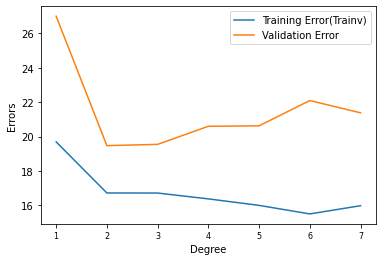

In [12]:
fig=plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(df['Degree'].values,df['Training Error(Trainv)'].values, label = 'Training Error(Trainv)')
ax.plot(df['Degree'].values,df['Validation Error'].values,label = 'Validation Error')
ax.set_xlabel('Degree')
ax.set_ylabel('Errors')
ax.tick_params(axis='x', labelsize=8)
ax.legend(loc='best')

In [13]:
#Let's finally fit a model with a chosen order of polynomial
#Artık 2. derecenin valid de en düşük mse olduğuna karar verdik.
poly_features = PolynomialFeatures(degree=2,include_bias=False)
#X_tran setini (X_trainv + X_valid) 2. dereceden poly hale transform ediyorum.
X_train_poly = poly_features.fit_transform(X_train)
#Linear regression instance oluşturuyoruz.
poly_model = LinearRegression()

poly_model.fit(X_train_poly, Y_train)
#Ve X_train_poly, Y_train eğitiyoruz.
X_test_poly = poly_features.fit_transform(X_test)
#En son hiç göstermediğim test setini devreye sokmadan önce 2. dereceden poly hale transform ediyorum.
Y_test_predict=poly_model.predict(X_test_poly)
#Artık X_test_poly üzerinden predict yapabilirim.
mse_test = mean_squared_error(Y_test, Y_test_predict)
#En son Y_test, Y_test_predict için mse ye bakıyorum .Bu benim en son söyleyeceğim skor olur.
print(mse_test)

23.777949113293655


Text(0, 0.5, 'Errors')

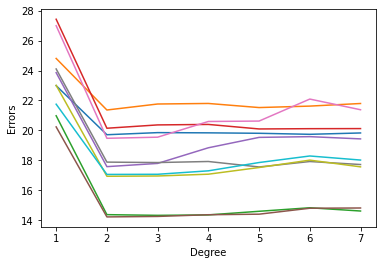

In [15]:
fig=plt.figure()
ax = fig.add_subplot(1, 1, 1)
for j in range(1,11):
    X_trainv, X_valid, Y_trainv, Y_valid = train_test_split(X_train, Y_train, test_size=0.5, random_state=j)
    
#random statei 1 den 11 e kadar değiştirip 10 farklı parçalama yapıyorum.Sonra 7 farklı polinomu deniyoruz.
    a=[]
    for i in range(1,8):
        a.append(create_polynomial_regression_model(i))
    df = pd.DataFrame(a,columns=['Training Error(Trainv)','Validation Error','Degree'])
    ax.plot(df['Degree'].values,df['Validation Error'].values, label = 'Training Error')
ax.set_xlabel('Degree')
ax.set_ylabel('Errors')

In [16]:
#Let's finally fit a model with a chosen order of polynomial
poly_features = PolynomialFeatures(degree=2,include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, Y_train)
X_test_poly = poly_features.fit_transform(X_test)
Y_test_predict=poly_model.predict(X_test_poly)
mse_test = mean_squared_error(Y_test, Y_test_predict)
print(mse_test)

23.777949113293655


In [17]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
X = np.array([1, 2, 3, 4])
Y = np.array([5 ,6, 7, 8])
for train_index, validation_index in loo.split(X):
    X_train, X_valid = X[train_index], X[validation_index]
    Y_train, Y_valid = Y[train_index], Y[validation_index]
    print(X_train, X_valid)

[2 3 4] [1]
[1 3 4] [2]
[1 2 4] [3]
[1 2 3] [4]


In [21]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
X = np.array([1, 2, 3, 4])
Y = np.array([5 ,6, 7, 8])
for train_index, validation_index in loo.split(Y):
    X_train, X_valid = X[train_index], X[validation_index]
    Y_train, Y_valid = Y[train_index], Y[validation_index]
    print(Y_train, Y_valid)

[6 7 8] [5]
[5 7 8] [6]
[5 6 8] [7]
[5 6 7] [8]


In [23]:
loo.split(X)
print(X_train, X_valid)

[1 2 3] [4]


In [25]:
y=np.array(auto['mpg'].values)
x=np.array(auto['horsepower'].values.reshape(-1,1))

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [27]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
LeaveOneOutErrors=[]
for train_index, validation_index in loo.split(X_train):
#X_traini tekrar train ve valid olarak ayırdık.
    X_trainv, X_valid = X_train[train_index], X_train[validation_index]
    Y_trainv, Y_valid = Y_train[train_index], Y_train[validation_index]
    LeaveOneOutErrors.append(create_polynomial_regression_model(4))
df = pd.DataFrame (LeaveOneOutErrors,columns=['Training Error','Validation Error','Degree'])
LeaveOneOutCV = df[['Training Error','Validation Error']].mean()  
LeaveOneOutCV  

Training Error      17.717221
Validation Error    18.329240
dtype: float64

In [28]:
df

,Training Error,Validation Error,Degree
0,17.773581,0.434358,4
1,17.771648,1.223944,4
2,17.702653,22.750464,4
3,17.765161,3.085358,4
4,17.741839,10.397366,4
...,...,...,...
308,17.764734,3.216237,4
309,17.754606,6.394813,4
310,17.767591,2.313419,4
311,17.773990,0.304625,4


In [29]:
loo = LeaveOneOut()
LeaveOneOutCV=[]
for j in range(1,8):
    LeaveOneOutErrors=[]
    for train_index, validation_index in loo.split(X_train):
        X_trainv, X_valid = X_train[train_index],X_train[validation_index]
        Y_trainv, Y_valid = Y_train[train_index], Y_train[validation_index]
        LeaveOneOutErrors.append(create_polynomial_regression_model(j))
        df = pd.DataFrame (LeaveOneOutErrors,columns=['Training Error','Validation Error','Degree'])
    LeaveOneOutCV.append([df['Validation Error'].mean(),df['Degree'][0]])  
LeaveOneOutCV_df = pd.DataFrame (LeaveOneOutCV,columns=['Validation Error','Degree'])
LeaveOneOutCV_df

,Validation Error,Degree
0,23.581743,1
1,18.087953,2
2,18.182536,3
3,18.329240,4
4,18.257448,5
5,18.375126,6
6,18.380267,7


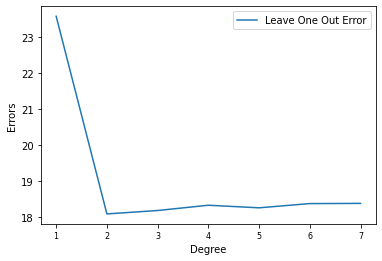

In [30]:
fig=plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(LeaveOneOutCV_df['Degree'].values,LeaveOneOutCV_df['Validation Error'].values,label = 'Leave One Out Error')
ax.set_xlabel('Degree')
ax.set_ylabel('Errors')
ax.tick_params(axis='x', labelsize=8)
ax.legend(loc='best')

In [31]:
#Let's finally fit a model with a chosen order of polynomial
poly_features = PolynomialFeatures(degree=2,include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, Y_train)
X_test_poly = poly_features.fit_transform(X_test)
Y_test_predict=poly_model.predict(X_test_poly)
mse_test = mean_squared_error(Y_test, Y_test_predict)
print(mse_test)

23.777949113293655


In [33]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=5,random_state=1, shuffle=True)
X = np.array([1, 2, 3, 4,5,6,7,8,9,10])
Y = np.array([11, 12, 13, 14,15,16,17,18,19,20])
for train_index, validation_index in cv.split(X):
    X_train, X_valid, Y_train, Y_valid = X[train_index], X[validation_index], Y[train_index], Y[validation_index]
    print(X_train, X_valid)

[1 2 4 5 6 7 8 9] [ 3 10]
[ 1  2  3  4  6  8  9 10] [5 7]
[ 2  3  5  6  7  8  9 10] [1 4]
[ 1  3  4  5  6  7  9 10] [2 8]
[ 1  2  3  4  5  7  8 10] [6 9]


In [35]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=5,random_state=1, shuffle=False)
X = np.array([1, 2, 3, 4,5,6,7,8,9,10])
Y = np.array([11, 12, 13, 14,15,16,17,18,19,20])
for train_index, validation_index in cv.split(X):
    X_train, X_valid, Y_train, Y_valid = X[train_index], X[validation_index], Y[train_index], Y[validation_index]
    print(X_train, X_valid)

[ 3  4  5  6  7  8  9 10] [1 2]
[ 1  2  5  6  7  8  9 10] [3 4]
[ 1  2  3  4  7  8  9 10] [5 6]
[ 1  2  3  4  5  6  9 10] [7 8]
[1 2 3 4 5 6 7 8] [ 9 10]


In [40]:
 from sklearn.model_selection import KFold

cv = KFold(n_splits=5,random_state=1, shuffle=False)
X = np.array([1, 2, 3, 4,5,6,7,8,9,10])
Y = np.array([11, 12, 13, 14,15,16,17,18,19,20])
for train_index, validation_index in cv.split(Y):
    X_train, X_valid, Y_train, Y_valid = X[train_index], X[validation_index], Y[train_index], Y[validation_index]
    print(Y_train, Y_valid)

[13 14 15 16 17 18 19 20] [11 12]
[11 12 15 16 17 18 19 20] [13 14]
[11 12 13 14 17 18 19 20] [15 16]
[11 12 13 14 15 16 19 20] [17 18]
[11 12 13 14 15 16 17 18] [19 20]


In [41]:
y=np.array(auto['mpg'].values)
x=np.array(auto['horsepower'].values.reshape(-1,1))

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [43]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, random_state=5, shuffle=True)
CVErrors=[]
for train_index, validation_index in cv.split(X_train):
    X_trainv, X_valid, Y_trainv, Y_valid = X_train[train_index], X_train[validation_index], Y_train[train_index], Y_train[validation_index]
    CVErrors.append(create_polynomial_regression_model(2))
df = pd.DataFrame (CVErrors,columns=['Training Error','Validation Error','Degree'])
kfoldCV = df[['Training Error','Validation Error']].mean()  
kfoldCV  

Training Error      17.768175
Validation Error    17.870217
dtype: float64

In [44]:
df

,Training Error,Validation Error,Degree
0,17.989912,17.055220,2
1,17.388761,19.373706,2
2,17.583495,18.601646,2
3,18.549342,14.710377,2
4,17.329364,19.610135,2


In [45]:
cv = KFold(n_splits=10, random_state=42, shuffle=True)
CVErrors=[]
for train_index, validation_index in cv.split(X_train):
    X_trainv, X_valid, Y_trainv, Y_valid = X_train[train_index], X_train[validation_index], Y_train[train_index], Y_train[validation_index]
    for j in range(1,8):
        CVErrors.append(create_polynomial_regression_model(j))
        df = pd.DataFrame (CVErrors,columns=['Training Error','Validation Error','Degree'])
df
#10 parçaya böüp her parça için 7 farklı derece denedik.

,Training Error,Validation Error,Degree
0,22.243896,31.826940,1
1,16.808504,26.350335,2
2,16.778261,26.245586,3
3,16.769890,26.133683,4
4,16.640612,25.504802,5
...,...,...,...
65,17.482690,20.442556,3
66,17.480153,20.645720,4
67,17.443759,19.595879,5
68,17.428471,19.235551,6


In [46]:
kfoldCV_by_degree = df.groupby("Degree")
kfoldCV_by_degree = kfoldCV_by_degree.mean()
kfoldCV_by_degree = kfoldCV_by_degree.reset_index()
kfoldCV_by_degree[['Degree', 'Validation Error']]
#Dereceye göre gruplayıp ortalama aldık.

,Degree,Validation Error
0,1,23.527574
1,2,17.969492
2,3,18.029290
3,4,18.122916
4,5,18.098855
5,6,18.177606
6,7,18.195550


In [ ]:
fig=plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(kfoldCV_by_degree['Degree'].values,kfoldCV_by_degree['Validation Error'].values,label = '5 fold CV Error')
ax.set_xlabel('Degree')
ax.set_ylabel('Errors')
ax.tick_params(axis='x', labelsize=8)
ax.legend(loc='best')

Text(0, 0.5, 'Errors')

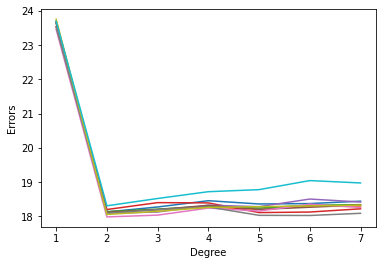

In [48]:
fig=plt.figure()
ax = fig.add_subplot(1, 1, 1)
for j in range(1,11):
#Kfold 10 defa tekrar edildi.
    cv = KFold(n_splits=10, random_state=j, shuffle=True)
    CVErrors=[]
    for train_index, validation_index in cv.split(X_train):
        X_trainv, X_valid, Y_trainv, Y_valid = X_train[train_index], X_train[validation_index], Y_train[train_index], Y_train[validation_index]
        for j in range(1,8):
            CVErrors.append(create_polynomial_regression_model(j))
            df = pd.DataFrame (CVErrors,columns=['Training Error','Validation Error','Degree'])
    kfoldCV_by_degree = df.groupby("Degree")
    kfoldCV_by_degree = kfoldCV_by_degree.mean()
    kfoldCV_by_degree = kfoldCV_by_degree.reset_index()
    kfoldCV_by_degree[['Degree', 'Validation Error']]
    ax.plot(kfoldCV_by_degree['Degree'].values,kfoldCV_by_degree['Validation Error'].values, label = 'Training Error')
ax.set_xlabel('Degree')
ax.set_ylabel('Errors')
